<h3><b>International football matches from 1872 to 2023</b></h3>
<h4>Data Analysis</h4>
<p>First of all, we need to understand how the data is stored. Then, we will proceed to clean them and show some statistics

In [24]:
#we import pandas, numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#we put all the data into different dataframes
df_results = pd.read_csv('csv_files/results.csv')
df_scorers = pd.read_csv('csv_files/goalscorers.csv')
df_shootouts = pd.read_csv('csv_files/shootouts.csv')

In [9]:
#we will first work on results dataframe
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45315 entries, 0 to 45314
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        45315 non-null  object
 1   home_team   45315 non-null  object
 2   away_team   45315 non-null  object
 3   home_score  45315 non-null  int64 
 4   away_score  45315 non-null  int64 
 5   tournament  45315 non-null  object
 6   city        45315 non-null  object
 7   country     45315 non-null  object
 8   neutral     45315 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


<p>Data cleaning</p>

In [11]:
#there aren't missing values, so we don't have to worry about them
#check if in date field there is the correct format 
df_results['date'] = pd.to_datetime(df_results['date'])
#let's check if there are incorrect values on number of goals (negative)
invalid_scores = df_results[(df_results['home_score'] < 0) | (df_results['away_score'] < 0)]
invalid_scores.shape[0]

0

<p>Some statistics</p>

In [13]:
#here we will see some statistics on the data
#top 5 teams with most games
team_counts = pd.concat([df_results['home_team'], df_results['away_team']]).value_counts()
top_5_teams = team_counts.head(5)
top_5_teams

Sweden       1065
England      1059
Brazil       1032
Argentina    1032
Germany       997
Name: count, dtype: int64

In [15]:
#top 5 teams with the most wins
home_wins = df_results[df_results['home_score'] > df_results['away_score']]['home_team'].value_counts()
away_wins = df_results[df_results['away_score'] > df_results['home_score']]['away_team'].value_counts()
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)
top_5_teams_wins = total_wins.head(5)
top_5_teams_wins

Brazil       659.0
England      605.0
Germany      577.0
Argentina    564.0
Sweden       525.0
Name: count, dtype: float64

In [17]:
#top 5 teams with the highest percentage of wins (with at least 10 games played)
total_games = team_counts[team_counts >= 10]
win_percentage = total_wins/total_games*100
top_5_percentage = win_percentage.sort_values(ascending=False).head(5)
top_5_percentage

Jersey            68.965517
Padania           67.441860
Basque Country    65.517241
Brazil            63.856589
Andalusia         61.538462
Name: count, dtype: float64

In [21]:
#percentage of games with 3 or more goals
tot_games = len(df_results)
over_games = (df_results['total_goals'] >= 3).sum()
perc_over = over_games/tot_games*100
perc_over

52.06443782412005

In [23]:
#percentage of games in which both teams has scored
goal_games = ((df_results['home_score'] > 0) & (df_results['away_score'] > 0)).sum()
perc_goal = goal_games/tot_games*100
perc_goal

46.688734414652984

In [34]:
#top 5 scorers in international games
scorers = df_scorers['scorer'].value_counts()
top_5_scorers = scorers.sort_values(ascending=False).head(5)
top_5_scorers

scorer
Cristiano Ronaldo     111
Robert Lewandowski     62
Romelu Lukaku          61
Harry Kane             55
Lionel Messi           54
Name: count, dtype: int64

<p>Data visualization</p>

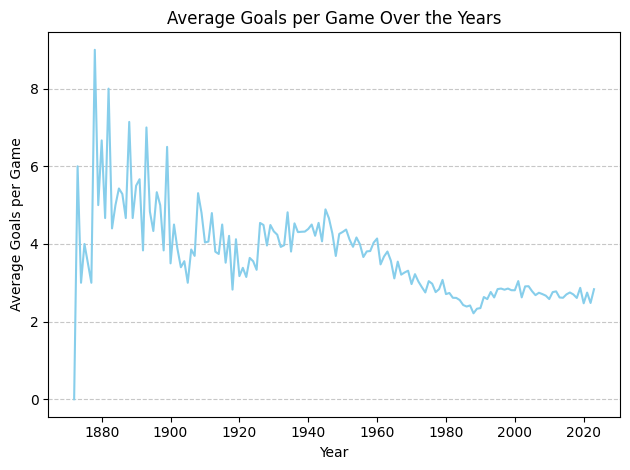

In [27]:
#average of goals in a game for each year
df_results['year'] = df_results['date'].dt.year
df_results['total_goals'] = df_results['home_score'] + df_results['away_score']
avg_goals_per_game = df_results.groupby('year')['total_goals'].mean()

avg_goals_per_game.plot(kind='line', color='skyblue')
plt.title('Average Goals per Game Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Goals per Game')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

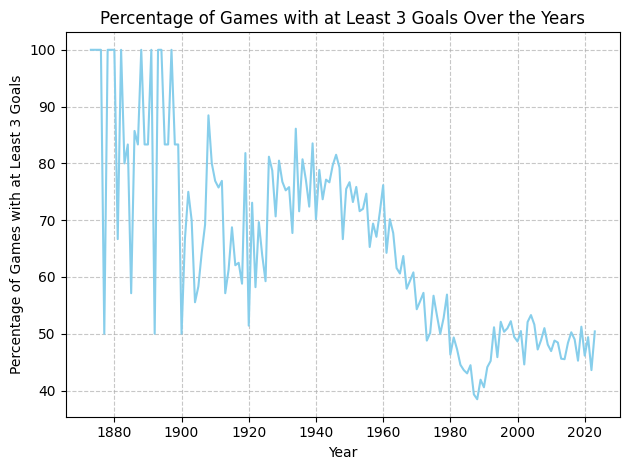

In [30]:
#percentage of games with at least 3 goals during the years
over_games_per_year = df_results[df_results['total_goals'] >= 3].groupby('year').size()
total_games_per_year = df_results.groupby('year').size()
perc_over_years = (over_games_per_year / total_games_per_year) * 100

perc_over_years.plot(kind='line', color='skyblue')
plt.title('Percentage of Games with at Least 3 Goals Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Games with at Least 3 Goals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


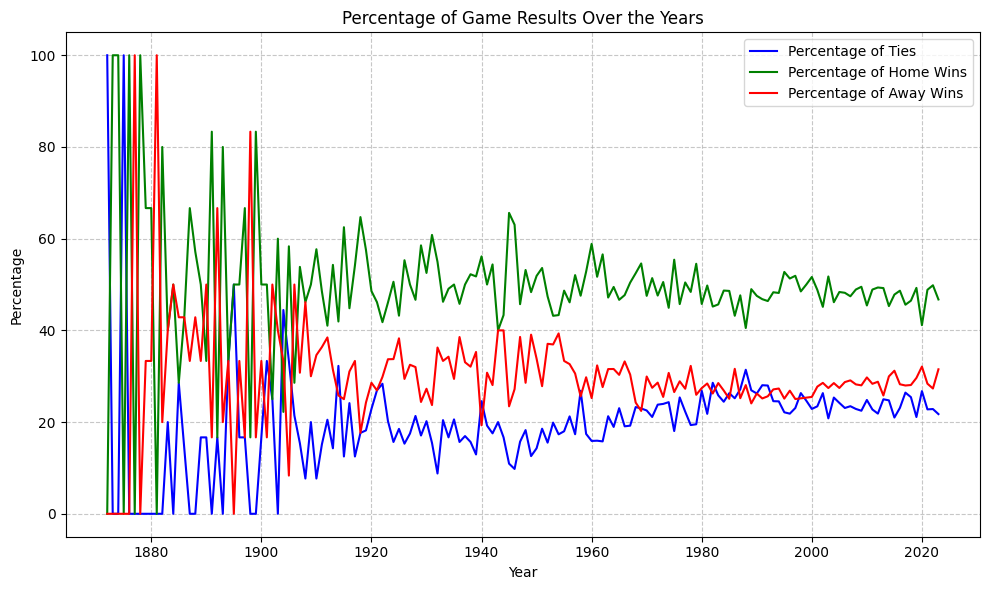

In [33]:
#percentage of ties, home wins, away wins over the years
df_results['result'] = 'Tie'
df_results.loc[df_results['home_score'] > df_results['away_score'], 'result'] = 'Home Win'
df_results.loc[df_results['home_score'] < df_results['away_score'], 'result'] = 'Away Win'
result_counts_per_year = df_results.groupby(['year', 'result']).size().unstack(fill_value=0)
total_games_per_year = df_results.groupby('year').size()
percentage_of_ties_per_year = (result_counts_per_year['Tie'] / total_games_per_year) * 100
percentage_of_home_wins_per_year = (result_counts_per_year['Home Win'] / total_games_per_year) * 100
percentage_of_away_wins_per_year = (result_counts_per_year['Away Win'] / total_games_per_year) * 100

plt.figure(figsize=(10, 6))
plt.plot(percentage_of_ties_per_year.index, percentage_of_ties_per_year.values, color='blue', label='Percentage of Ties')
plt.plot(percentage_of_home_wins_per_year.index, percentage_of_home_wins_per_year.values, color='green', label='Percentage of Home Wins')
plt.plot(percentage_of_away_wins_per_year.index, percentage_of_away_wins_per_year.values, color='red', label='Percentage of Away Wins')
plt.title('Percentage of Game Results Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()